In [2]:

from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

# 이진 분류 문제, Outcome이 1 => 당뇨, 출력층 1개 
df = pd.read_csv("C:/Users/tansy/Ai/diabetes.csv", index_col=0)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


Text(0.5, 1.0, 'Outcome')

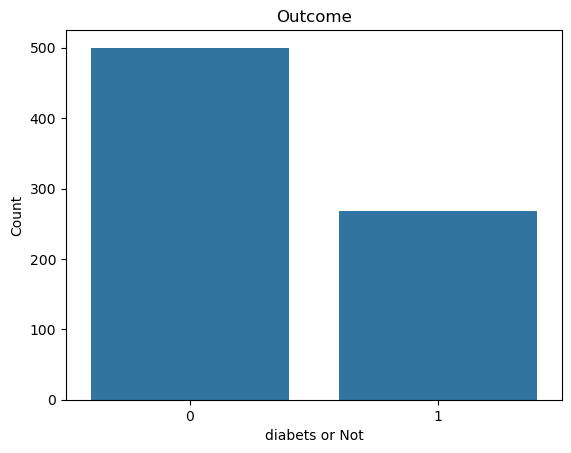

In [4]:
# OutCome 당 데이터 개수 확인(0, 1) 

sns.countplot(data= df , x="Outcome") 
plt.xlabel("diabets or Not")
plt.ylabel('Count')
plt.title("Outcome") 
           

In [5]:
# 결측치 확인. 결측치란 : 데이터에 값이 없는 것.(Null), 속성값 0 => 결측치 없음 
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()


Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: xlabel='BloodPressure', ylabel='Density'>

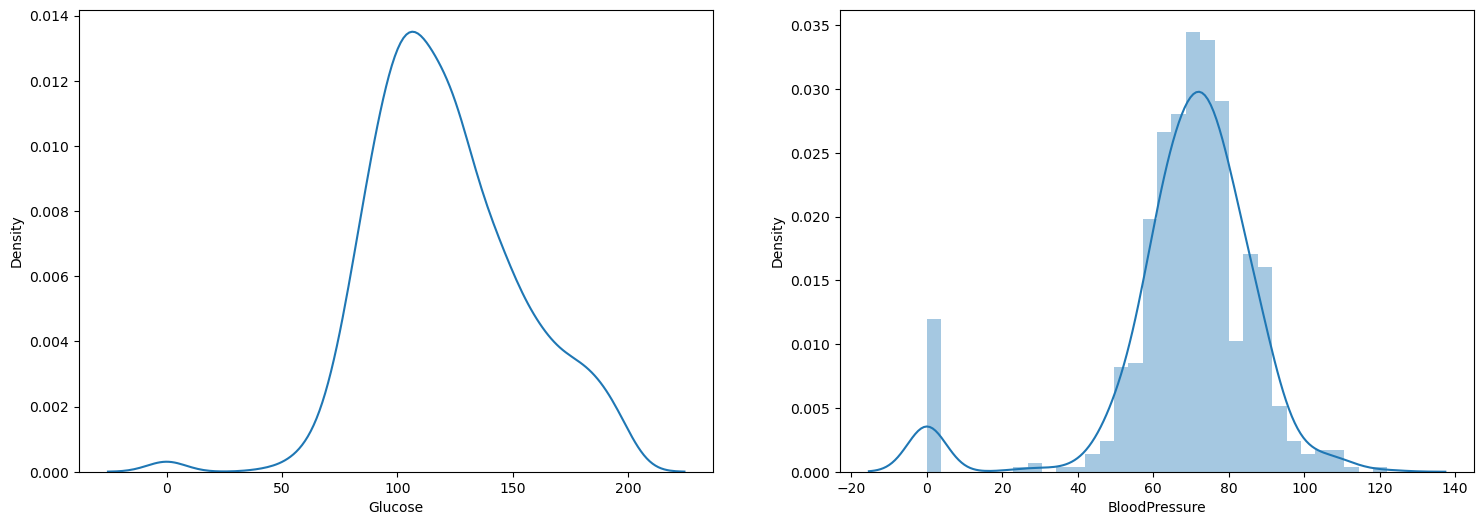

In [7]:
# 컬럼별 히스토그램 확인
# 'Glucose'와'BloodPressure' 칼럼을 선택. 

figure = plt.figure(figsize=(18,6))
ax1 = plt.subplot(1,2,1)
sns.distplot(df['Glucose'], kde = True, hist = False, ax=ax1) # hist:False => 히스토그램 안그림 
ax2 = plt.subplot(1,2,2)
sns.distplot(df['BloodPressure'], ax=ax2) # kde와 히스토그램이 그려짐 

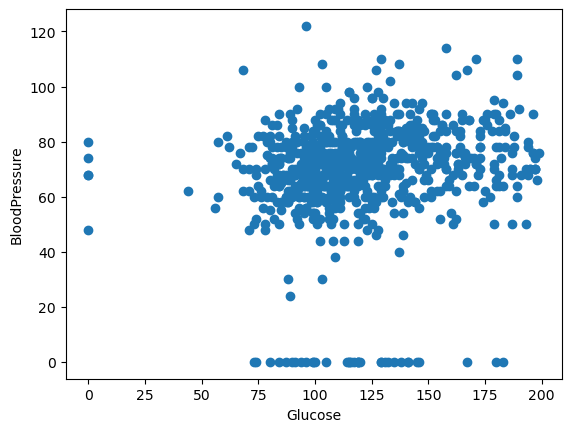

In [8]:
# 1. 산점도 확인 => 데이터 간의 관계를 분석.


import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['Glucose'], df['BloodPressure'])
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')

plt.show()

# => 점들이 흩어져 있는 것으로 보아 둘의 상관관계는 없어 보임 

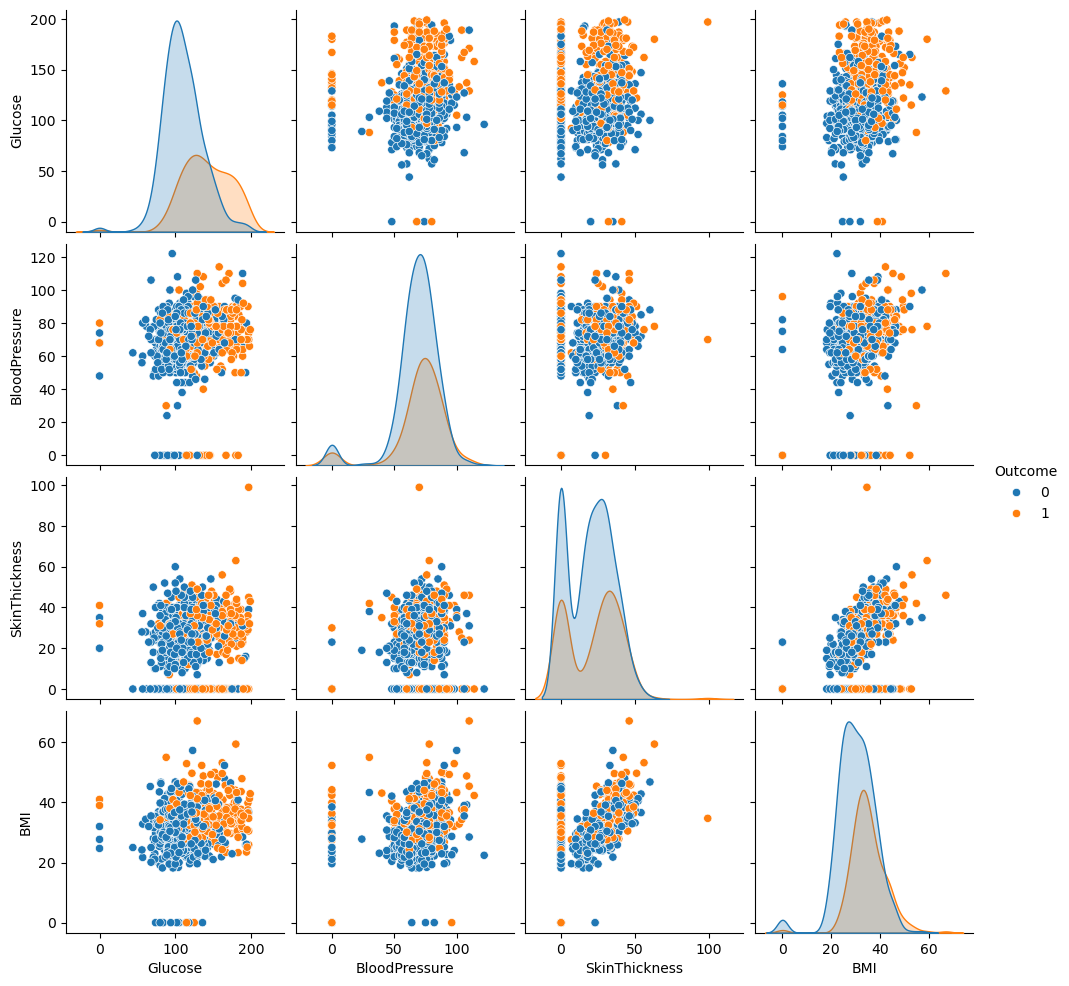

In [9]:
# 2. pairplot을 이용한 4개 속성의 상관관계 살펴보기 

sns.pairplot(df,
             vars=['Glucose', 'BloodPressure', 'SkinThickness', 'BMI'],
            hue ='Outcome')
plt.show()

# 산점도(by pairplot)을 이용한 칼럼간의 상관관계 분석과 당뇨병에 미치는 영향 살펴보기

## 1. Glucose와 다른 데이터간의 분석 => 점이 흩어져있는 것으로 보아 다른 속성 간의 상관관계 없음. 
### Glucose가 높으면 Outcome이 1값이 많은 것으로 보아 Glucose가 높을수록 당뇨병을 가질 확률이 높음. 

## 2. BMI와 SkinThickness간의 상관관계 분석 
### 우상향으로 보이는 것으로 보아 SkinThickness가 높을수록 BMI가 높음. 또한 BMI, SkinThickness가 높으면 주황색 점이 많은 것으로 보아 당뇨병일 확률도 높음



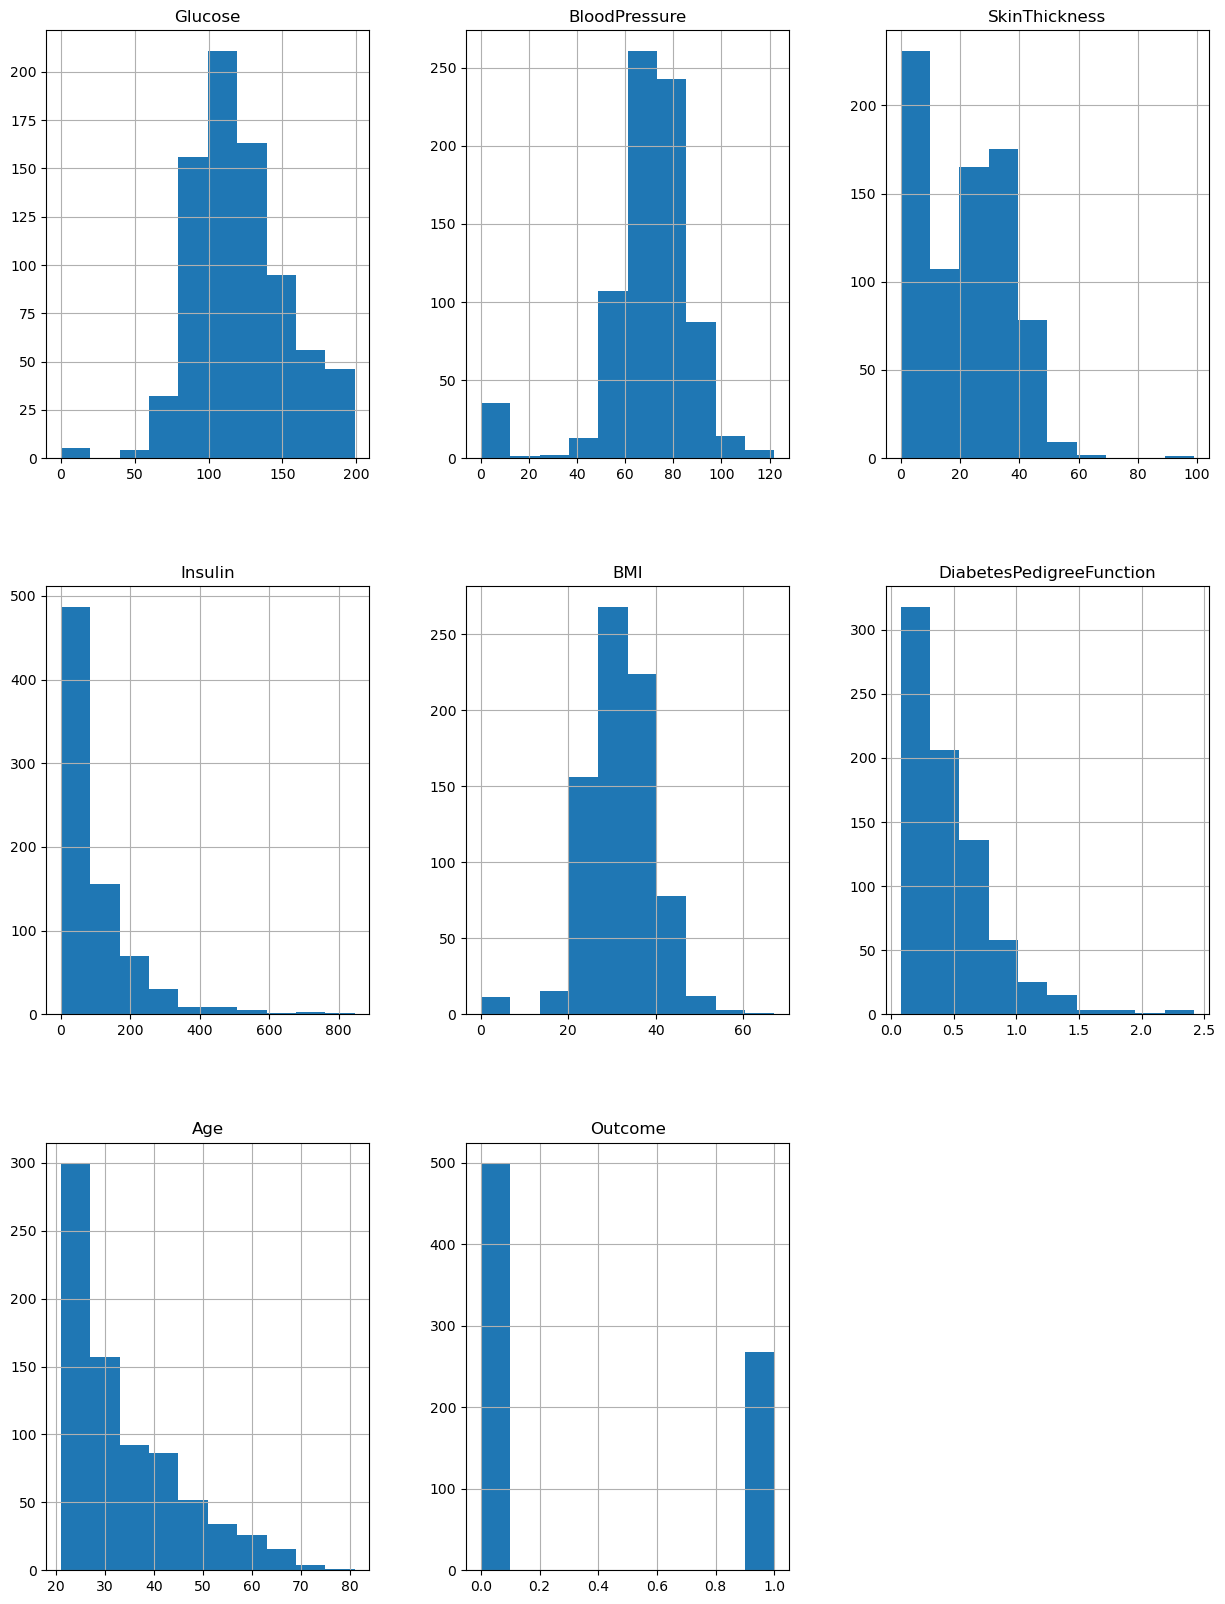

In [10]:
# 모든 칼럼의 히스토그램을 그림(분포) 

fig = plt.figure(figsize = (15,20))
ax = fig.gca() # 모든 칼럼을 축으로 활성화 
df.hist(ax = ax) # 히스토그램 그리기
plt.show()

In [11]:
# X => Label 제거된 데이터 
X=df.drop('Outcome',axis=1)
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,,,,,,,
6,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
8,183,64,0,0,23.3,0.672,32
1,89,66,23,94,28.1,0.167,21
0,137,40,35,168,43.1,2.288,33


In [12]:
# y => 레이블 
y=df['Outcome'] 
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

# 머신러닝 분류 수행 

## 1. SVM : 두 부류 사이의 경계를 가장 마진이 크게 설정하기 위한 지도학습 모델

In [13]:
#1. 데이터셋 불러오기 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0) # train 3 : test 1 비율 

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [15]:
from sklearn.svm import SVC 

clf_cvm = SVC(random_state=0) # SVM 모델 생성 
clf_cvm.fit(X_train, y_train) # 1. 모델 훈련 : X_train : 입력 데이터 y_train : 레이블 

# 2. 모델 평가 : 정확도 
pred_svm = clf_cvm.predict(X_test)

print(accuracy_score(y_test, pred_svm))     #   열 : 실제 예측값           0       1
print (confusion_matrix(y_test, pred_svm))  #                        0 TN(119)  FP(11)   FP : 0인 데이터를 1로 잘못 예측함 
                                            #               
                                            # 행: 실제 데이터값       1  FN(31)  TP(31)   

0.78125
[[119  11]
 [ 31  31]]


# 2. 로지스틱 회귀(Logistic Regression) : 분류 알고리즘
## 개념 : 시그모이드 함수를 가지고 입력값을 0과 1로 변환.(0.5 이상 => 1 미만 => 0)  



In [16]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.7916666666666666
[[116  14]
 [ 26  36]]


# 3. MLP : 다층 퍼셉트론(인공신경망) 

## (1)아래 인공지능 모델 문제점 : 특징 개수에 비해 모델의 은닉 층의 수가 적기 때문에 정확도가 좋지 않음 

In [17]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")

print("1. MLP Model INFO")
print("Number of layers (including input and output):", clf_nn.n_layers_)
print("Number of output neurons:", clf_nn.n_outputs_)
print("Hidden layer sizes:", clf_nn.hidden_layer_sizes)
print("Activation function:", clf_nn.activation)

print("\n2. Accuarcy") 
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
1. MLP Model INFO
Number of layers (including input and output): 3
Number of output neurons: 1
Hidden layer sizes: (100,)
Activation function: relu

2. Accuarcy
0.6875
[[111  19]
 [ 41  21]]


## 4. 결정 트리(Decision Tree) : 트리 구조를 통한 데이터 분류. 비선형 데이터 처리에 용이. 

### 하이퍼 파라미터 : 모델이 학습하기 전에 설정해야되는 매개변수들. ex) 층의 수, 층별 뉴런의 수, 커널 크기 등 

### max_depth => 과적합 사전에 방지 


--- Decision Tree Classifier ---
0.7760416666666666
[[113  17]
 [ 26  36]]


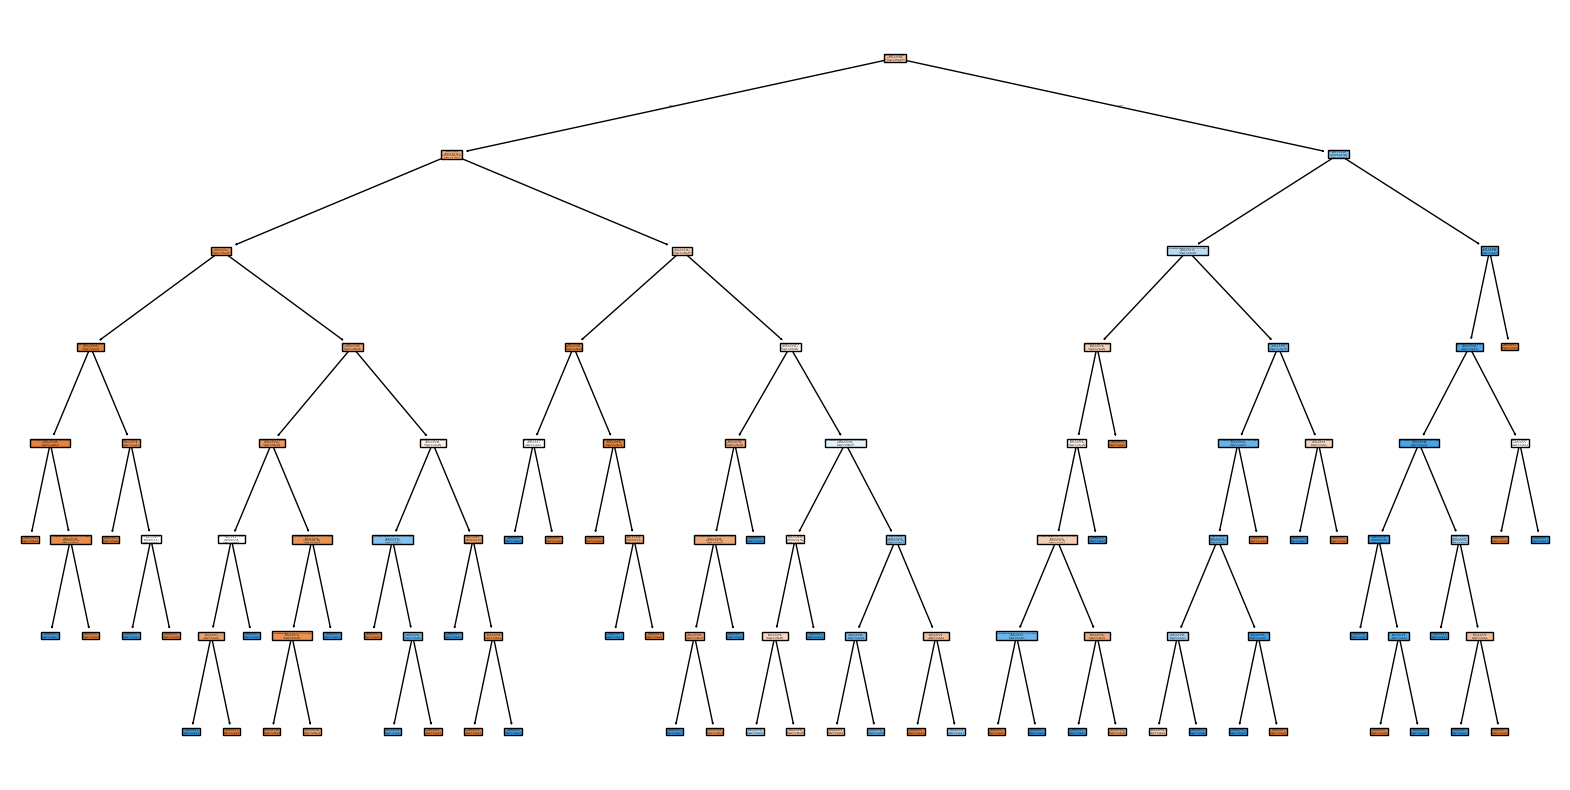

In [18]:
from sklearn import tree
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(max_depth=7, random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))

# 결정 트리 시각화
plt.figure(figsize=(20,10))
tree.plot_tree(clf_dt, filled=True, feature_names=X.columns, class_names=['Class 0', 'Class 1'])
plt.show()

## 5. RandomForest Classifier(랜덤 포레스트) : 여러 결정 트리를 앙상블하여 사용하는 모델 

In [22]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(max_depth=7, random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.7916666666666666
[[119  11]
 [ 29  33]]
